In [3]:
import numpy as np
import pandas as pd
import scipy.linalg as sla
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [36]:
class MyLinearRegression:
    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept
        
    def fit(self, X, y):
        # Get X, y and count weights
        
        n, k = X.shape
        
        X_train = X
        if self.fit_intercept:
            X_train = np.hstack((X, np.ones((n, 1))))
            print(X_train)
        
        self.w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y
        
        return self
    
    def predict(self, X):
        # Get X and return model responses
        n, k = X.shape
        if self.fit_intercept:
            X_train = np.hstack((X, np.ones((n, 1))))
            
        y_pred = X_train @ self.w
        
        return y_pred
        
    def get_weights(self):
        return self.w

In [37]:
from sklearn.model_selection import train_test_split


In [38]:
# besed on features, generate target values with some noise
def linear_expression(X):
    return 5 * X + 6

objects_num = 50
X = np.linspace(-5, 5, objects_num)
y = linear_expression(X) + np.random.randn(objects_num) * 5

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

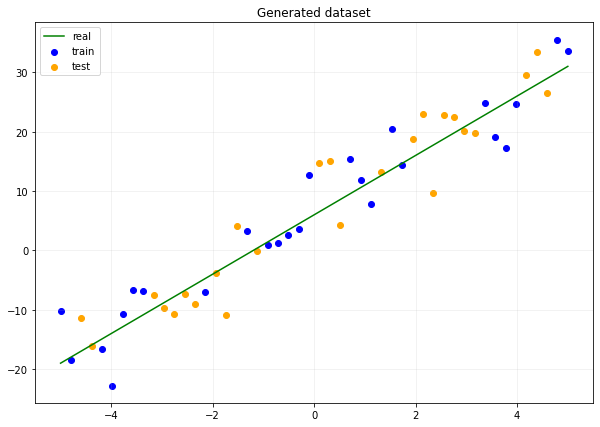

In [39]:
plt.figure(figsize=(10, 7))
plt.plot(X, linear_expression(X), label='real', color='g')
plt.scatter(X_train, y_train, label='train', color='b')
plt.scatter(X_test, y_test, label='test', color='orange')

plt.title("Generated dataset")
plt.grid(alpha=0.2)
plt.legend()
plt.show()

In [43]:
regressor = MyLinearRegression()

regressor.fit(X_train[:, np.newaxis], y_train)

predictions = regressor.predict(X_test[:, np.newaxis])
w = regressor.get_weights()
w

[[-1.32653061  1.        ]
 [ 1.53061224  1.        ]
 [-0.71428571  1.        ]
 [ 1.12244898  1.        ]
 [ 0.91836735  1.        ]
 [ 3.36734694  1.        ]
 [-3.57142857  1.        ]
 [-0.91836735  1.        ]
 [ 1.73469388  1.        ]
 [-0.51020408  1.        ]
 [ 5.          1.        ]
 [-0.10204082  1.        ]
 [-4.18367347  1.        ]
 [ 3.57142857  1.        ]
 [ 4.79591837  1.        ]
 [ 3.97959184  1.        ]
 [-3.97959184  1.        ]
 [-3.7755102   1.        ]
 [-2.14285714  1.        ]
 [ 3.7755102   1.        ]
 [ 0.71428571  1.        ]
 [-3.36734694  1.        ]
 [-5.          1.        ]
 [-4.79591837  1.        ]
 [-0.30612245  1.        ]]


array([4.87795545, 6.81303424])

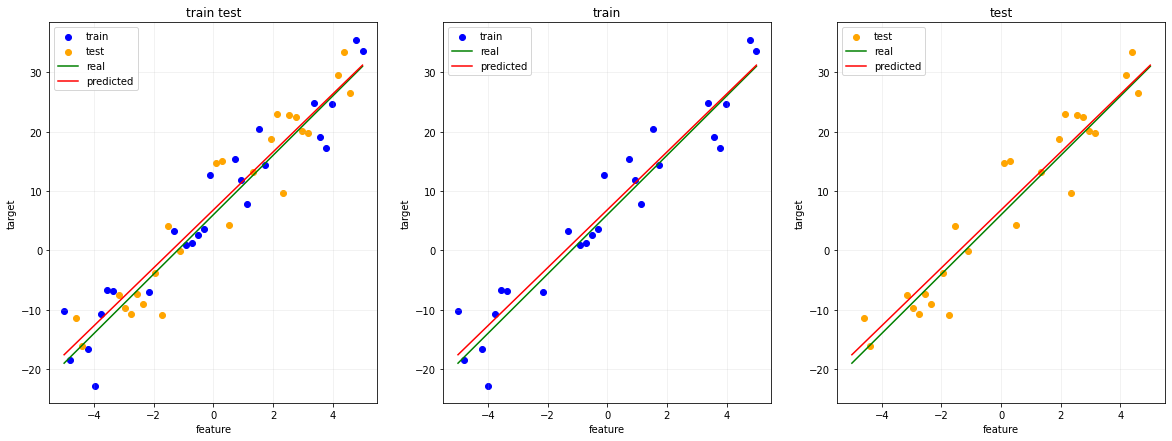

In [48]:
plt.figure(figsize=(20, 7))
ax = None

for i, types in enumerate([['train', 'test'], ['train'], ['test']]):
    ax = plt.subplot(1, 3, i + 1, sharey=ax)
    if 'train' in types:
        plt.scatter(X_train, y_train, label='train', color='b')
    if 'test' in types:
        plt.scatter(X_test, y_test, label='test', color='orange')
        
    plt.plot(X, linear_expression(X), label='real', c='g')
    plt.plot(X, regressor.predict(X[:, np.newaxis]), label='predicted', c='r')
    
    plt.ylabel('target')
    plt.xlabel('feature')
    plt.title(' '.join(types))
    plt.grid(alpha=0.2)
    plt.legend()
plt.show()

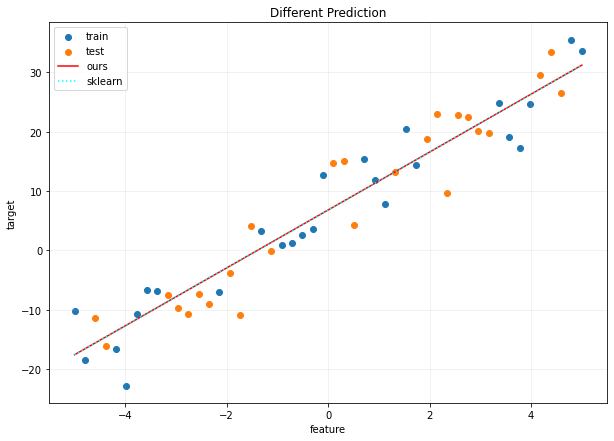

In [56]:
sk_reg = LinearRegression().fit(X_train[:, np.newaxis], y_train)

plt.figure(figsize=(10, 7))
#plt.plot(X, linear_expression(X), label='real', c='g')

plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X, regressor.predict(X[:, np.newaxis]),
         label='ours', c='r', linestyle='-')
plt.plot(X, sk_reg.predict(X[:, np.newaxis]), 
         label='sklearn', c='cyan', linestyle=':')

plt.title('Different Prediction')
plt.ylabel('target')
plt.xlabel('feature')
plt.grid(alpha=0.2)
plt.legend()
plt.show()

In [59]:
from sklearn.metrics import mean_squared_error

test_predictions = regressor.predict(X_test[:, np.newaxis])

print('Test MSE: ', mean_squared_error(y_test, test_predictions))

Test MSE:  19.140843439714054
